In [1]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy.engine import URL
from sqlalchemy import create_engine

In [26]:
plt.style.use('fivethirtyeight')

SQL

In [3]:
# FT1 23.04% - CTP selftest
CTP_selftest_query = """ 
SELECT [TblFinal].[tDateTime]
      ,[TblFinal].[StationID]
      ,[TblFinal].[SerialNumber]
      ,[ProductName]
      ,[Version]
      ,[ExeInfo]
      ,[Item152]
      ,[Item152St]
      ,[SO]
      ,[Job_GPN]
  FROM [ate_db_tblfinal_new].[dbo].[TblFinal]

  LEFT JOIN TblFinal2 on TblFinal.SerialNumber = TblFinal2.SerialNumber

  WHERE ItemNameType = '15688'
  and TblFinal.tDateTime > '2022-08-24 01:48:42'
  /*and TblFinal.tDateTime BETWEEN '2022-08-24 01:48:42' and '2022-08-25 06:21:49'*/
  and Item152St in ('0','1')
  order by tDateTime ASC
"""

VEXT_query = """
SELECT top(2000)[TblFinal].[tDateTime]
      ,[Item180] as 'BatteryVol'
      ,[Item207] as 'VEXTcurrent'
      ,[Item207St] as 'VEXTcurrentSt'
      ,[ExeInfo]
      ,[TblFinal].[StationID]
      ,[TblFinal].[SerialNumber]
      ,[ProductName]
      ,[Version]
      ,[SO]
      ,[Job_GPN]
  FROM [ate_db_tblfinal_new].[dbo].[TblFinal]

  LEFT JOIN TblFinal2 on TblFinal.SerialNumber = TblFinal2.SerialNumber

  WHERE ItemNameType = '15689' 
  and TblFinal.tDateTime BETWEEN '2022-07-01' and '2022-09-06 05:16:17'
  order by BatteryVol DESC
"""

Motor_query = """
SELECT [tDateTime]
      ,[ItemNameType]
      ,[StationID]
      ,[SerialNumber]
      ,[ProductName]
      ,[Item58]
      ,[Item58St]
      ,[SO]
      ,[Job_GPN]
  FROM [ate_db_tblcpu].[dbo].[TblCpu]
  WHERE ItemNameType = 15545
  and tDateTime BETWEEN '2022-08-11 10:56:50' and '2022-08-22 02:42:58'
  and Item58St in ('0','1')
  ORDER BY tDateTime ASC
"""

#No use
Motor_query_after0822 = """
SELECT [tDateTime]
      ,[ItemNameType]
      ,[StationID]
      ,[SerialNumber]
      ,[ProductName]
      ,[Item58]
      ,[Item58St]
      ,[SO]
      ,[Job_GPN]
  FROM [ate_db_tblcpu].[dbo].[TblCpu]
  WHERE ItemNameType = 15545
  and tDateTime > '2022-08-22 02:42:58'
  and Item58St in ('0','1')
  ORDER BY tDateTime ASC
"""

tblfinal

In [4]:
tblfinal = "DRIVER={SQL Server};SERVER=ATE_SERVER;DATABASE=ate_db_tblfinal_new;UID=ate_oper;PWD=ate.oper"
tblfinal_engine = create_engine(URL.create("mssql+pyodbc", query={"odbc_connect": tblfinal}))

CTP_selftest = pd.read_sql(CTP_selftest_query, tblfinal_engine)
VEXT = pd.read_sql(VEXT_query, tblfinal_engine)


tblcpu

In [17]:
tblcpu = "DRIVER={SQL Server};SERVER=ATE_SERVER;DATABASE=ate_db_tblcpu;UID=ate_oper;PWD=ate.oper"
tblfinal_engine = create_engine(URL.create("mssql+pyodbc", query={"odbc_connect": tblcpu}))

Motor = pd.read_sql(Motor_query, tblfinal_engine)
#Motor_after0822 = pd.read_sql(Motor_query_after0822, tblfinal_engine)

Top1 FT2 23.91% - VEXT Current(charging) 6.43%

In [6]:
VEXT = VEXT[VEXT.VEXTcurrent > 0]

Text(4.28, 350, '4.275')

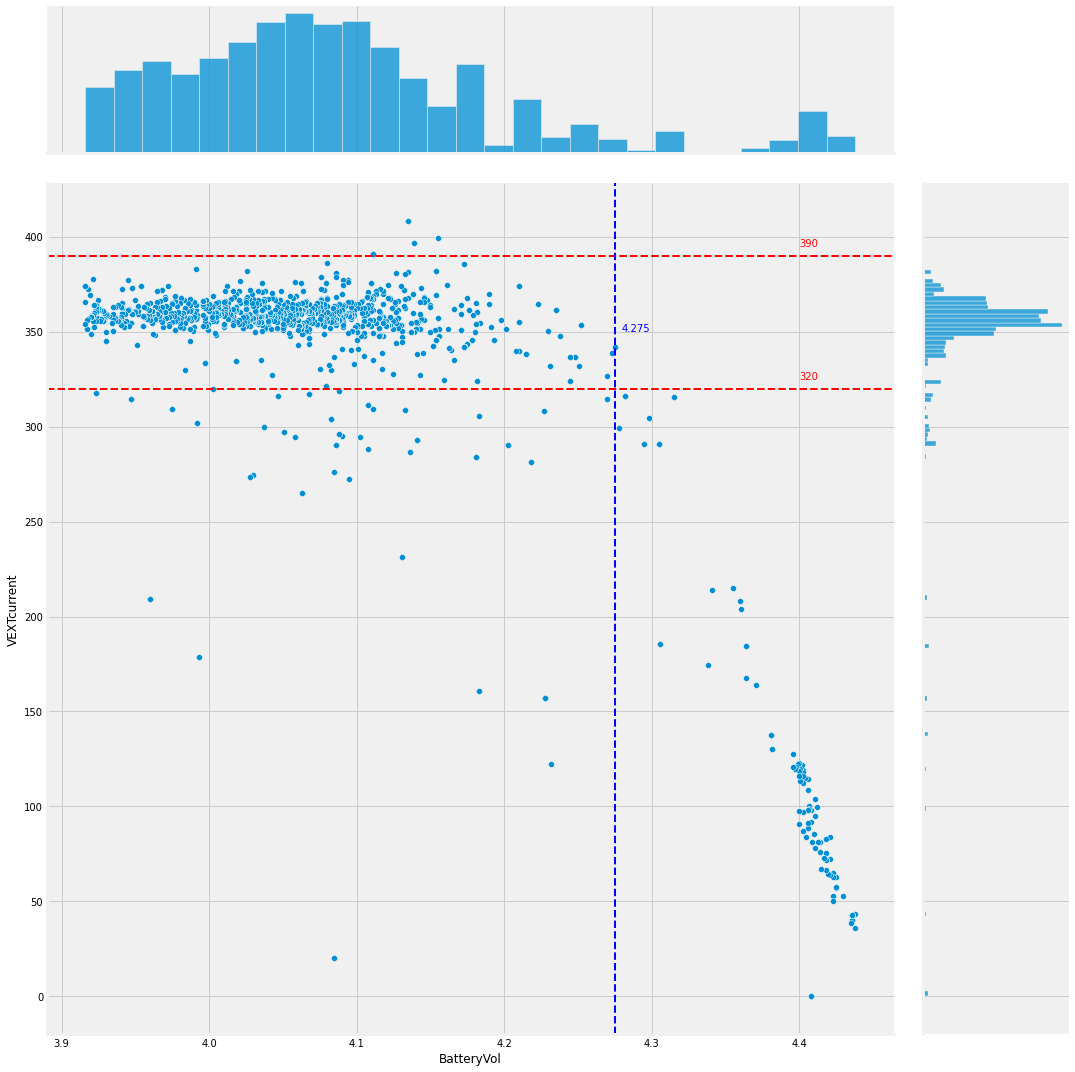

In [7]:
plot = sns.jointplot(data=VEXT, x='BatteryVol', y='VEXTcurrent', kind='scatter', height=15)
plot.ax_joint.axhline(y=320, ls='--', color='r', lw=2)
plot.ax_joint.text(s='320', y=325, x=4.4, color='red')
plot.ax_joint.axhline(y=390, ls='--', color='r', lw=2)
plot.ax_joint.text(s='390', y=395, x=4.4, color='red')
plot.ax_joint.axvline(x=4.275, ls='--', lw=2, color='blue')
plot.ax_joint.text(s='4.275', y=350, x=4.280, color='blue')

In [8]:
VEXT[VEXT.VEXTcurrent>320]['BatteryVol'].max()

4.275

Top2 FT1 23.04% - CTP selftest 12.91%

In [9]:
CTP_selftest.drop_duplicates(inplace=True)

In [10]:
CTP_selftest['TestProgramVersion'] = CTP_selftest.ExeInfo.apply(lambda x : x.split(' ')[3])

<AxesSubplot:xlabel='Item152St', ylabel='count'>

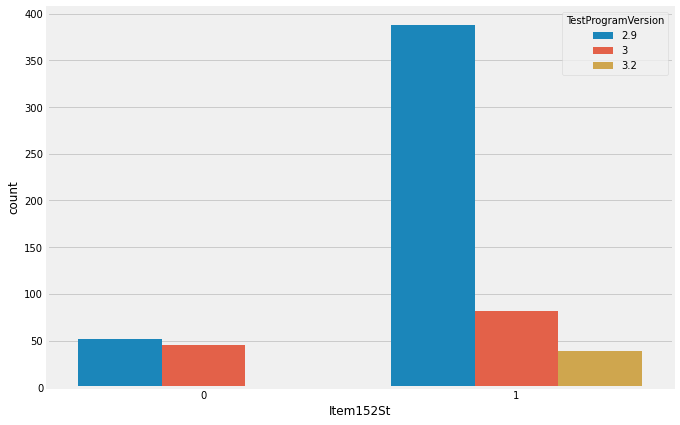

In [11]:
plt.figure(figsize=(10,7))
sns.countplot(data=CTP_selftest, x='Item152St', hue='TestProgramVersion')

In [12]:
# Seens problem didn't solved, so EE just close this test item.

Top3 AutoATE 22.51% - Motor Resonant Frequency 7.22%

In [18]:
Motor.head()

,tDateTime,ItemNameType,StationID,SerialNumber,ProductName,Item58,Item58St,SO,Job_GPN
0,2022-08-16 07:34:04.283,15545,1,3428300979,MARQ ATHLETE GEN2 V09.28,218.4599,1,16017746,012-04263-05
1,2022-08-16 07:36:29.737,15545,3,3428300990,MARQ ATHLETE GEN2 V09.28,210.7482,1,16017746,012-04263-05
2,2022-08-16 08:08:09.957,15545,1,3428300981,MARQ ATHLETE GEN2 V09.28,209.0957,1,9999999,None
3,2022-08-16 08:08:45.443,15545,2,3428300989,MARQ ATHLETE GEN2 V09.28,219.9010,1,9999999,None
4,2022-08-16 08:09:12.760,15545,4,3428300991,MARQ ATHLETE GEN2 V09.28,201.7146,1,9999999,None


<AxesSubplot:ylabel='Density'>

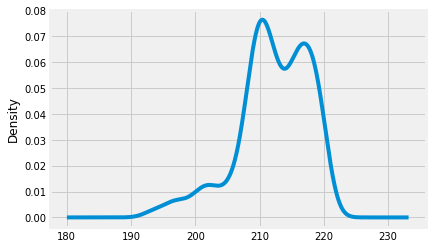

In [19]:
Motor.loc[Motor.Item58St==1,'Item58'].plot.kde()
# This motor's frequency mean value is 210

In [20]:
NG_ESN = Motor.loc[Motor.Item58St == 0,'SerialNumber'].unique()

In [21]:
Motor_retry = Motor[Motor.SerialNumber.isin(NG_ESN)].sort_values(['SerialNumber','tDateTime'], ascending=True)
Motor_retry = Motor_retry[Motor_retry.SerialNumber != '3428300662']

In [22]:
Motor_retry_first = Motor_retry.drop_duplicates(subset='SerialNumber', keep='first')

In [23]:
Motor_retry_last = Motor_retry.drop_duplicates(subset='SerialNumber', keep='last')

Text(0.5, 1.0, 'NG_ESN(19units)_retry')

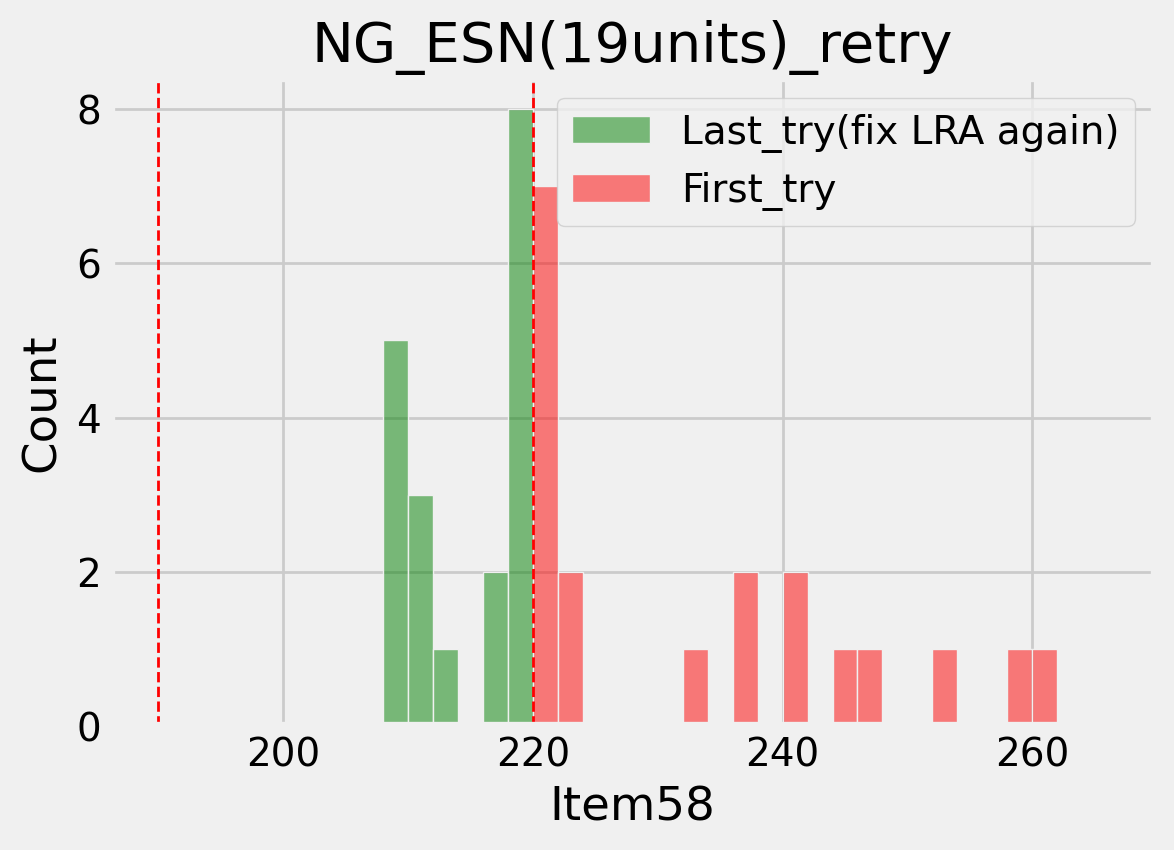

In [27]:
plt.figure(dpi=200)
ax = sns.histplot(data=Motor_retry_last['Item58'], binrange=[190,220],binwidth=2, color='green', alpha=0.5)
sns.histplot(data=Motor_retry_first['Item58'],binrange=[220,265],binwidth=2, color='red', alpha=0.5)
plt.legend(labels=['Last_try(fix LRA again)','First_try'])
plt.axvline(220, ls='--', color='red', lw=1)
plt.axvline(190, ls='--', color='red', lw=1)
plt.title('NG_ESN(19units)_retry')

In [25]:
#sns.histplot(data=Motor_after0822, x='Item58', hue='Item58St')